In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re
import tensorflow.keras as tfk
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import text file as a tab-delimited file
column_names=['Review', 'Sentiment']
df=pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D213/Task 2/sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', names=column_names)
pd.set_option('max_colwidth', 160)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [3]:
#Look at first 5 rows
df.head()

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [4]:
#Get shape of data
df.shape

(1000, 2)

In [5]:
#Get value counts for sentiment. o=neg, 1=pos
sentiment_counts=df.Sentiment.value_counts()
sentiment_counts

0    500
1    500
Name: Sentiment, dtype: int64

In [6]:
#Check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
#Check null and NaN values
df.isna().sum()
df.dropna(inplace=True)
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

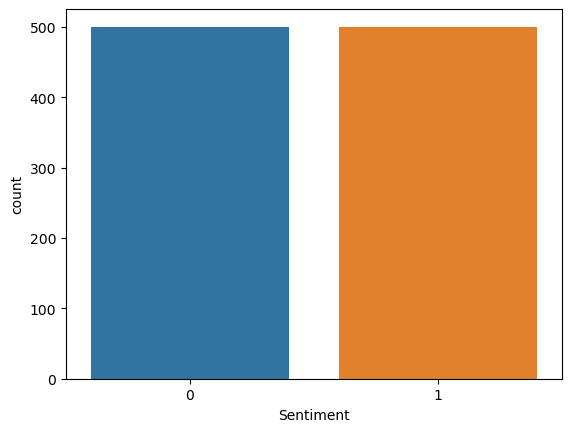

In [8]:
#Create count plot for sentiment values
sns.countplot(df, x="Sentiment")

In [9]:
#lower case the reviews
df['Review']=df['Review'].str.lower()
df

,Review,Sentiment
0,so there is no way for me to plug it in here in the us unless i go by a converter.,0
1,"good case, excellent value.",1
2,great for the jawbone.,1
3,tied to charger for conversations lasting more than 45 minutes.major problems!!,0
4,the mic is great.,1
...,...,...
995,the screen does get smudged easily because it touches your ear and face.,0
996,what a piece of junk.. i lose more calls on this phone.,0
997,item does not match picture.,0
998,the only thing that disappoint me is the infra red port (irda).,0


In [10]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Review'] = df['Review'].apply(remove_punctuation)
df.head()

,Review,Sentiment
0,so there is no way for me to plug it in here in the us unless i go by a converter,0
1,"good case, excellent value",1
2,great for the jawbone,1
3,tied to charger for conversations lasting more than 45 minutesmajor problems,0
4,the mic is great,1


In [11]:
#Initial list of words/characters in Reviews
reviews=df['Review']
list_of_chars=[]
for comment in reviews:
    for character in reviews:
        if character not in list_of_chars:
            list_of_chars.append(character)
list_of_chars

['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case, excellent value',
 'great for the jawbone',
 'tied to charger for conversations lasting more than 45 minutesmajor problems',
 'the mic is great',
 'i have to jiggle the plug to get it to line up right to get decent volume',
 'if you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one',
 'if you are razr owneryou must have this',
 'needless to say, i wasted my money',
 'what a waste of money and time',
 'and the sound quality is great',
 'he was very impressed when going from the original battery to the extended battery',
 'if the two were seperated by a mere 5+ ft i started to notice excessive static and garbled sound from the headset',
 'very good quality though',
 'the design is very odd, as the ear clip is not very comfortable at all',
 'highly recommend for any one who has a blue tooth phone',
 'i advise everyone do not be fooled',
 

In [12]:
#Look for unusual characters and grammar
description_list=[]
stop_words=stopwords.words('english')
for description in df.Review:
#Remove special characters and punctuation
    description=re.sub("[^a-zA-Z]", " ", description)
#Perform tokenization 
    description=nltk.word_tokenize(description)
#Implement lemmatization
    lemma=nltk.WordNetLemmatizer()
    decription= [lemma.lemmatize(word) for word in description]
print(description)

['you', 'can', 'not', 'answer', 'calls', 'with', 'the', 'unit', 'never', 'worked', 'once']


In [13]:
#Remove stopwords
description=[word for word in description if not word in stop_words]
description= " ".join(description)
description_list.append(description)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
#Identify vocab size
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df['Review'])
vocab_size=len(tokenizer.word_index)+1
print("Vocabulary size:", vocab_size)

Vocabulary size: 1905


In [15]:
#Determine review lengths
review_length=[]
for char_len in reviews:
    review_length.append(len(char_len.split(" ")))
    
review_max=np.max(review_length)
review_min=np.min(review_length)
review_median=np.median(review_length)
print("Max length of sequences is: ", review_max)
print("Mid length of sequences is: ", review_median)
print("Min length of sequences is: ", review_min)

Max length of sequences is:  30
Mid length of sequences is:  9.0
Min length of sequences is:  1


In [16]:
#Calculate embedding dimension
max_sequence_embedding= int(round(np.sqrt(np.sqrt(vocab_size)), 0))
max_sequence_embedding

7

In [17]:
#Split the data
X_train, X_test, y_train, y_test= train_test_split(df['Review'], df['Sentiment'], test_size=0.20, random_state=15)

y_train= pd.Series(y_train)
y_test= pd.Series(y_test)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (800,)
Test size: (200,)


In [18]:
#Pad the split data
padding_type='post'
trunc_type='post'
#Train data
sequences_train= tokenizer.texts_to_sequences(X_train)
padded_train= pad_sequences(sequences_train, maxlen=review_max, padding=padding_type, truncating=trunc_type)
#Test data
sequences_test= tokenizer.texts_to_sequences(X_test)
padded_test= pad_sequences(sequences_test, maxlen=review_max, padding=padding_type, truncating=trunc_type)

In [19]:
#Display padded sequence
import sys
np.set_printoptions(threshold=sys.maxsize)
padded_train[1]

array([590,  50,  15, 610,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [20]:
#Convert padded data into array for model
training_padded= np.array(padded_train)
training_label= np.array(y_train)

test_padded= np.array(padded_test)
test_label= np.array(y_test)

In [21]:
training_padded.shape

(800, 30)

In [22]:
#Create model

#Define early stopping
early_stopping_monitor = EarlyStopping(patience=2)

model = Sequential()
model.add(Embedding(vocab_size, max_sequence_embedding, input_shape = (training_padded.shape[1],)))
model.add(GlobalAveragePooling1D())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu')) 
model.add(Dense(2, activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])  
model.summary()

2024-05-28 18:34:53.408032: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-05-28 18:34:53.408057: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-28 18:34:53.408064: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-28 18:34:53.408319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-28 18:34:53.408333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 30, 7)          │        13,335 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 7)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,287 (75.34 KB)

 Trainable params: 19,287 (75.34 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Fit the model
num_epochs=10
history= model.fit(training_padded, training_label, batch_size=32, epochs=num_epochs, validation_data=(test_padded, test_label), callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/10


2024-05-28 18:34:54.628007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5223 - loss: 0.6927 - val_accuracy: 0.4700 - val_loss: 0.6938
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5329 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5905 - loss: 0.6890 - val_accuracy: 0.4750 - val_loss: 0.6892
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6194 - loss: 0.6737 - val_accuracy: 0.7900 - val_loss: 0.6632
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8356 - loss: 0.6254 - val_accuracy: 0.7800 - val_loss: 0.6001
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8333 - loss: 0.5098 - val_accuracy: 0.5800 - val_loss: 0.6169
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8780 - loss: 0.3772 - val_accuracy: 0.7950 - val_loss: 0.4824
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9162 - loss: 0.2571 - val_accuracy: 0.7900 - val_loss: 0.462

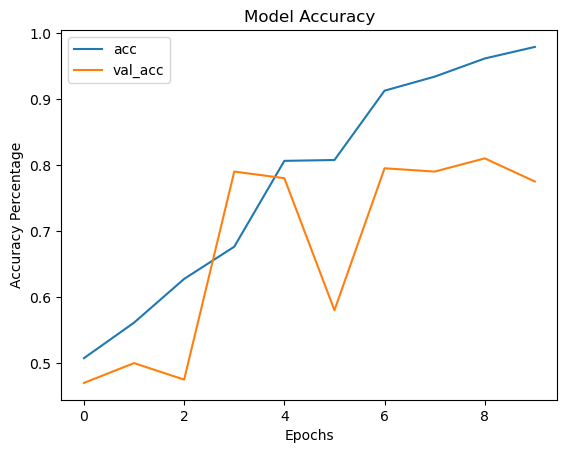

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Percentage')
plt.title('Model Accuracy')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

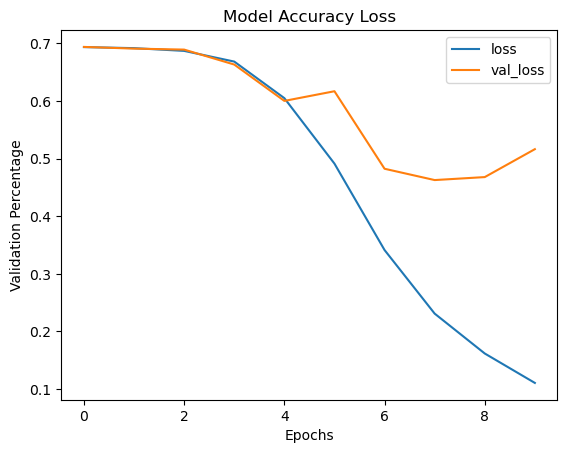

<Figure size 640x480 with 0 Axes>

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Percentage')
plt.title('Model Accuracy Loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [26]:
#Verify model accuracy on test data
score= model.evaluate(test_padded, test_label, verbose=0)
print(f'Test loss: {score[0]}/ Test accuracy: {score[1]}')

Test loss: 0.5163717269897461/ Test accuracy: 0.7749999761581421


In [27]:
#Verify model accuracy on training data 
score= model.evaluate(training_padded, training_label, verbose=0)
print(f'Test loss: {score[0]}/ Test accuracy: {score[1]}')

Test loss: 0.0946609303355217/ Test accuracy: 0.9825000166893005


In [28]:
#Save the model
model.save('my_model.keras')

In [29]:
#Load my model
my_model=load_model('my_model.keras')

In [30]:
#Perform predictions on training data
predictions=my_model.predict(training_padded)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
#Perform predictions on test data
predictions=my_model.predict(test_padded)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [32]:
X_test

825                                                                the shipping time was also very quick
374    not a good item it worked for a while then started having problems in my auto reverse tape player
488                                  then i exchanged for the same phone, even that had the same problem
608                                                      it is cheap, and it feel and look just as cheap
42                                                                             nice headset priced right
                                                     ...                                                
664                                                                   does everything it should and more
962                                                                   also makes it easier to hold on to
144                                        the phone takes forever to charge like 2 to 5 hours literally
955                                                    

In [33]:
##Verfy prediction sentiment
i=144

print("Predicted review test:", X_test[i], "\n:")
print("Predicted:", "Negative" if predictions [i][0] >= 0.5 else "Positive", "review")
print("Actual:", "Negative" if y_test[i] == 0 else "Positive", "review")

Predicted review test: the phone takes forever to charge like 2 to 5 hours literally 
:
Predicted: Positive review
Actual: Negative review
